## Importing Libraries

In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Assigning classes

In [4]:
df_fake["class"] = 0
df_true["class"] = 1

## Merging and dropping unimportant columns

In [5]:
df_merge = pd.concat([df_fake, df_true], axis =0 )

In [6]:
df = df_merge.drop(["title", "subject","date"], axis = 1)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

## Removing unnecessary words and stop words

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

def wordprocess(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    text = ' '.join(filtered_tokens)
    
    return text.strip()

df["text"] = df["text"].apply(wordprocess)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\taham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting into train and test datasets

In [8]:
x = df["text"]
y = df["class"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Hyperparameter Tuning

### Number of Estimators Tuning

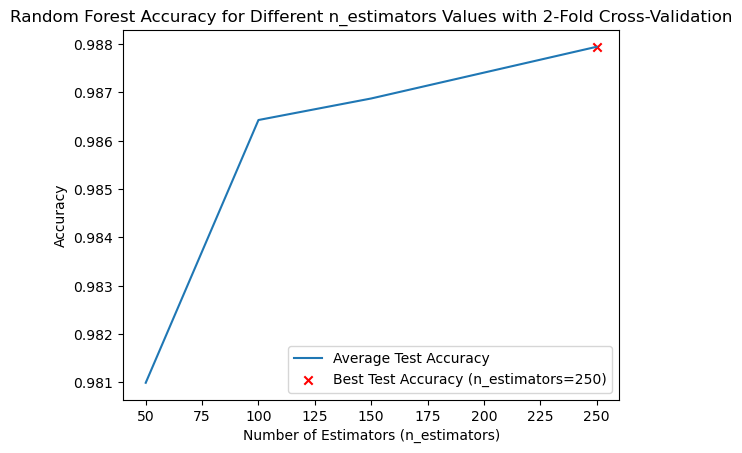

Best n_estimators: 250
Corresponding Test Accuracy: 0.9879429063199334


In [11]:
n_estimators_values = [50, 100, 150, 200, 250]

test_accuracies = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    scores = cross_val_score(rf_model, xv_train, y_train, cv=2, scoring='accuracy')   
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)
best_n_estimators = n_estimators_values[best_index]

plt.plot(n_estimators_values, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_n_estimators, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (n_estimators={best_n_estimators})')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different n_estimators Values with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best n_estimators: {best_n_estimators}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

### Max Depths Tuning

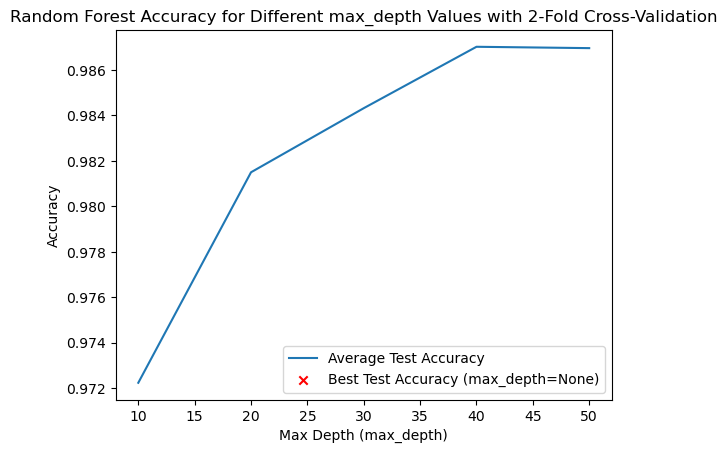

Best max_depth: None
Corresponding Test Accuracy: 0.9879429063199334


In [12]:
max_depth_values = [None, 10, 20, 30, 40, 50]

test_accuracies = []

for max_depth in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth, random_state=42)

    scores = cross_val_score(rf_model, xv_train, y_train, cv=2, scoring='accuracy')   
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)

best_max_depth = max_depth_values[best_index]

plt.plot(max_depth_values, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_max_depth, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (max_depth={best_max_depth})')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different max_depth Values with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best max_depth: {best_max_depth}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

### Minimum Samples Split Tuning

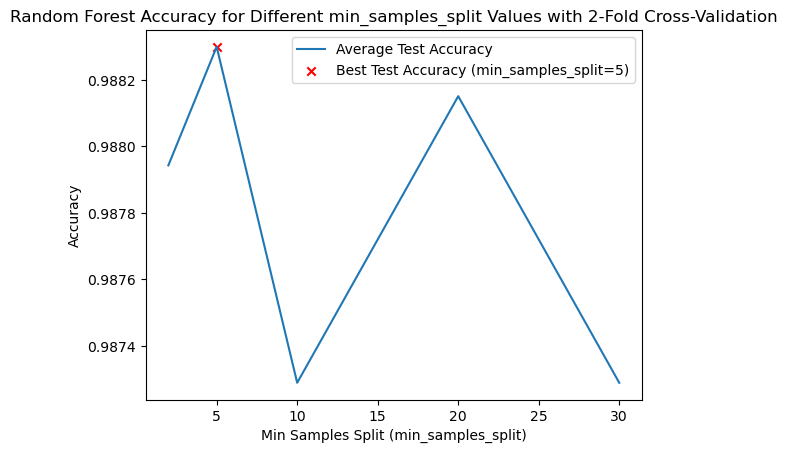

Best min_samples_split: 5
Corresponding Test Accuracy: 0.9882992890351273


In [13]:
min_samples_split_values = [2, 5, 10, 20, 30]

test_accuracies = []

for min_samples_split in min_samples_split_values:
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split, random_state=42)

    scores = cross_val_score(rf_model, xv_train, y_train, cv=2, scoring='accuracy')
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)

best_min_samples_split = min_samples_split_values[best_index]

plt.plot(min_samples_split_values, test_accuracies, label='Average Test Accuracy')
plt.scatter(best_min_samples_split, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (min_samples_split={best_min_samples_split})')
plt.xlabel('Min Samples Split (min_samples_split)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different min_samples_split Values with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

### Max Features Tuning

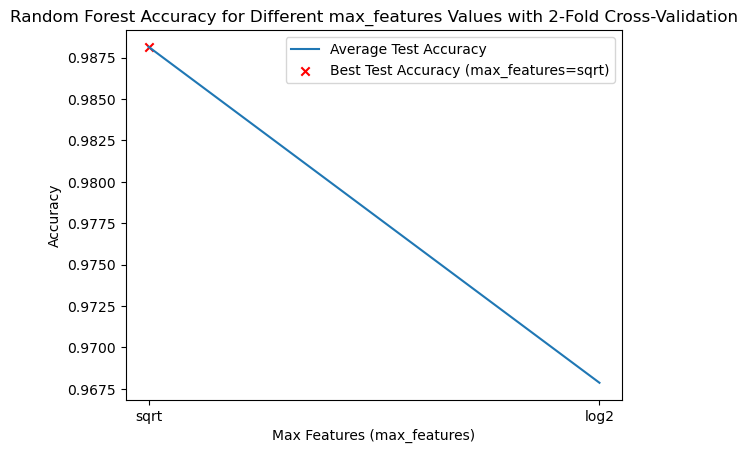

Best max_features: sqrt
Corresponding Test Accuracy: 0.9881508082902359


In [15]:
max_features_values = ['sqrt', 'log2']

test_accuracies = []

for max_features in max_features_values:
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, max_features=max_features, random_state=42)

    scores = cross_val_score(rf_model, xv_train, y_train, cv=2, scoring='accuracy')   
    
    mean_test_accuracy = np.mean(scores)
    
    test_accuracies.append(mean_test_accuracy)

best_index = np.argmax(test_accuracies)

best_max_features = max_features_values[best_index]

plt.plot(range(len(max_features_values)), test_accuracies, label='Average Test Accuracy')
plt.scatter(best_index, test_accuracies[best_index], color='red', marker='x', label=f'Best Test Accuracy (max_features={best_max_features})')
plt.xticks(range(len(max_features_values)), max_features_values)
plt.xlabel('Max Features (max_features)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy for Different max_features Values with 2-Fold Cross-Validation')
plt.legend()
plt.show()

print(f"Best max_features: {best_max_features}")
print(f"Corresponding Test Accuracy: {test_accuracies[best_index]}")

## Analyzing the Best Machine Learning Algorithm

### Confusion Matrix

Test Accuracy: 0.9935857461024499


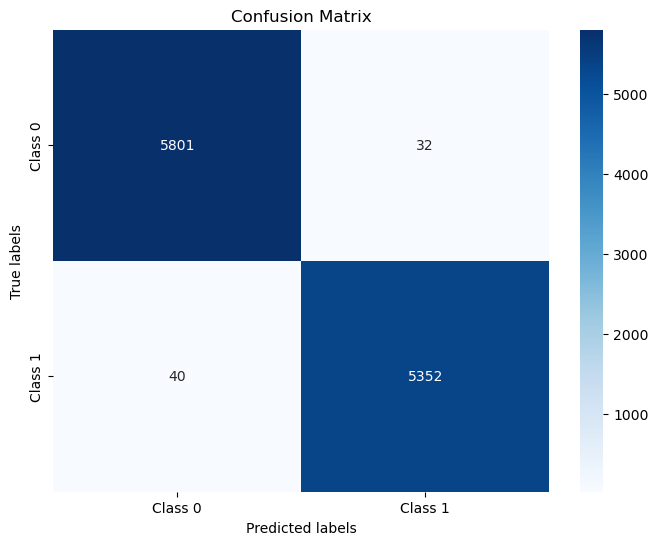

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

best_RFC = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, max_features=best_max_features, random_state=42)
best_RFC.fit(xv_train,y_train)

test_accuracy = best_RFC.score(xv_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_rfc = best_RFC.predict(xv_test)

# Assuming xv_test and y_test are your test data
conf_matrix = confusion_matrix(y_test, pred_rfc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

print("\nClassification Report:")
print(classification_report(y_test, pred_rfc))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, pred_rfc)
print("\nROC AUC Score:", roc_auc)

from sklearn.metrics import precision_recall_fscore_support

accuracy = accuracy_score(y_test, pred_rfc)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred_rfc, average='weighted')

# Print classification report with precision, recall, and F1-score rounded to 3 decimal places
print("Classification Report:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1_score))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5833
           1       0.99      0.99      0.99      5392

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225


ROC AUC Score: 0.9935477873004357
Classification Report:
Accuracy: 0.9936
Precision: 0.9936
Recall: 0.9936
F1-score: 0.9936


### ROC Curve

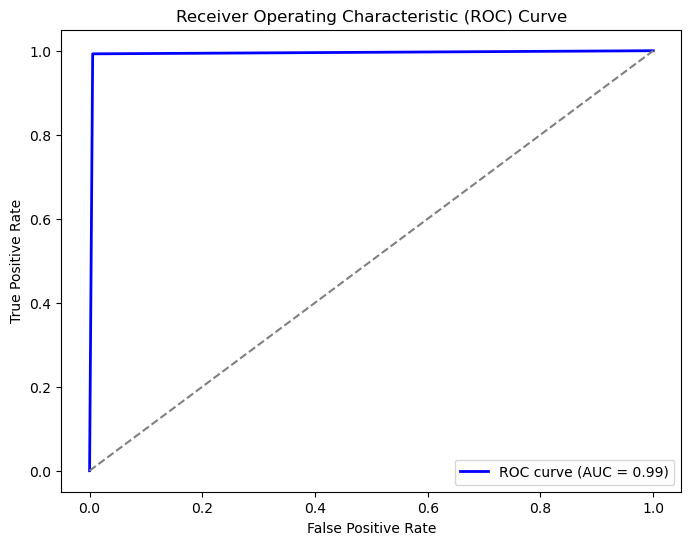

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()